# E-Commerce Sales Analysis

## Introduction:
In the fast-paced world of e-commerce, understanding sales dynamics is crucial for sustained growth and customer satisfaction. Our analysis delves into sales data, revealing key insights and trends that drive our business forward.

### Data Overview:
We started by cleaning and preparing a dataset of 9,994 orders, ensuring data integrity by handling missing values and converting data types appropriately. Our primary goal was to uncover patterns and derive actionable insights from various dimensions such as shipping modes, customer segments, product categories, and geographic regions.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# To Read CSV file
super_store = pd.read_csv('./dataset/Superstore Dataset.csv')
super_store.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717


In [26]:
# To fine number of rows and columne
super_store.shape

(9994, 20)

In [27]:
# To Find the null values
super_store.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         16
Profit            0
dtype: int64

- As we can see that there are null valuse in discount

In [28]:
# let's fill the null values in the super store dataset
super_store['Discount'].fillna(0, inplace=True)

In [29]:
super_store.isnull().sum() # now the null values will be filled

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Analysis on Ship Mode
- We can find the highest sales shiping mode

In [30]:
# To find that In which shipping mode the products are sales higher
super_store['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [31]:
x = super_store['Ship Mode'].value_counts().index
y= super_store['Ship Mode'].value_counts().values
print(x)
print(y)
# here we just find the x-axis and y-axis for the diagram

Index(['Standard Class', 'Second Class', 'First Class', 'Same Day'], dtype='object', name='Ship Mode')
[5968 1945 1538  543]


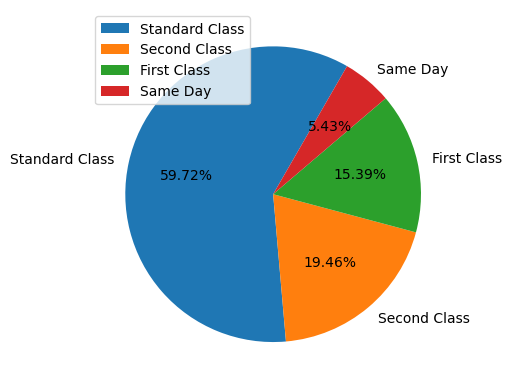

In [32]:
# Now we have both axis so we can create a diagram to know that in which shiping mode the sales are higher
plt.pie(y, labels=x, startangle=60, autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

**Shipping Modes:** Standard Class shipping is the preferred choice for the majority of our customers, accounting for nearly 60% of sales. This insight underscores the importance of maintaining efficiency and reliability in our standard shipping process. On the other hand, Same Day shipping, despite being a premium service, accounts for only 5.43% of sales, indicating potential for targeted marketing to boost its adoption.

## Analysis on Ship Mode and Category

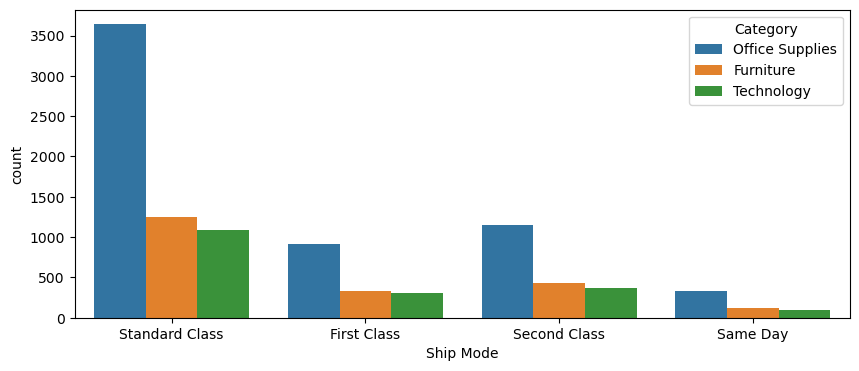

In [33]:
# Creating a Graph of ship mode and category to find that in which ship mode which category making highest salse
plt.figure(figsize=(10, 4))
sns.countplot(x="Ship Mode", data= super_store, hue="Category")
plt.show()

- In the all four shiping modes The highest sales are for office supplies and then for furniture and then technology

## Analysis on Segment
- By segment we can find that From which segment customers are coming more

In [34]:
# let's find that From which segment customers are coming more
super_store['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

- So as we can see, the customers are coming more from consumer then home office segmen and then corporate
- To show it more clearly lets create a plot

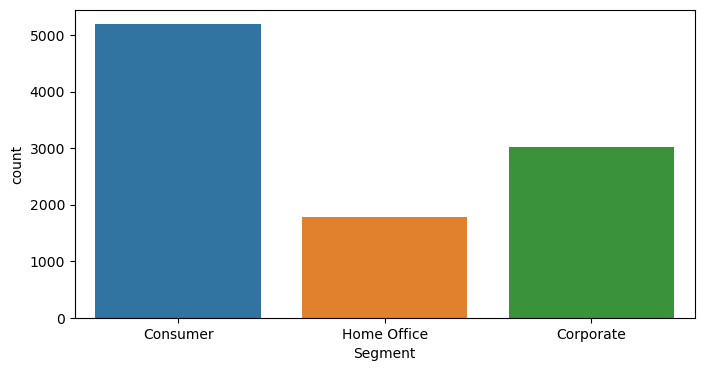

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Segment', data=super_store)
plt.show()

**Customer Segments:** The Consumer segment is our largest customer base, followed by Corporate and Home Office segments. This distribution highlights the need for diversified marketing strategies to cater to each segment's unique preferences and buying behaviors.

## Analysis on category and sub-category
- let's create a plot for all sub-categories of each category 

In [36]:
super_store['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

- Now as we khow that we have total 3 categories so let's do analysis on their sub categories

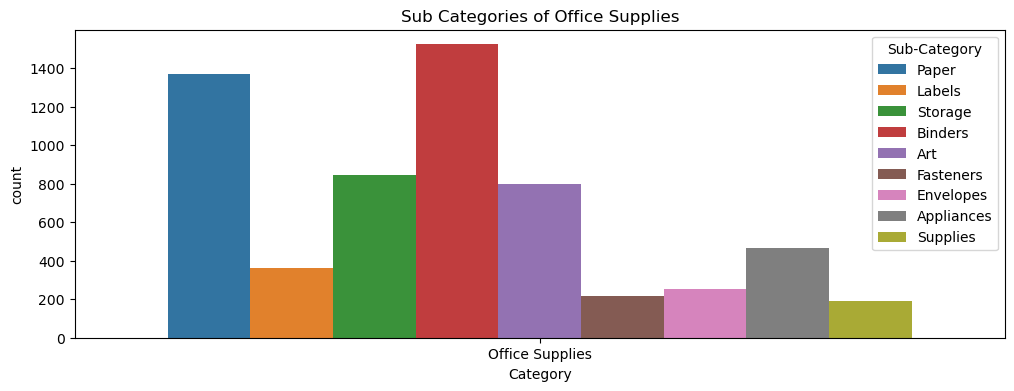

In [37]:
# Create a plot for Office Supplies
plt.figure(figsize=(12, 4))
sns.countplot(x='Category', data=super_store[super_store['Category'] == 'Office Supplies'], hue='Sub-Category')
plt.title('Sub Categories of Office Supplies')
plt.show()

- Now we can see more clearly that which sub-category of office supplies has more sales
- If somebody or company ask from us, what did you find from the plot so we could explain this plot easly

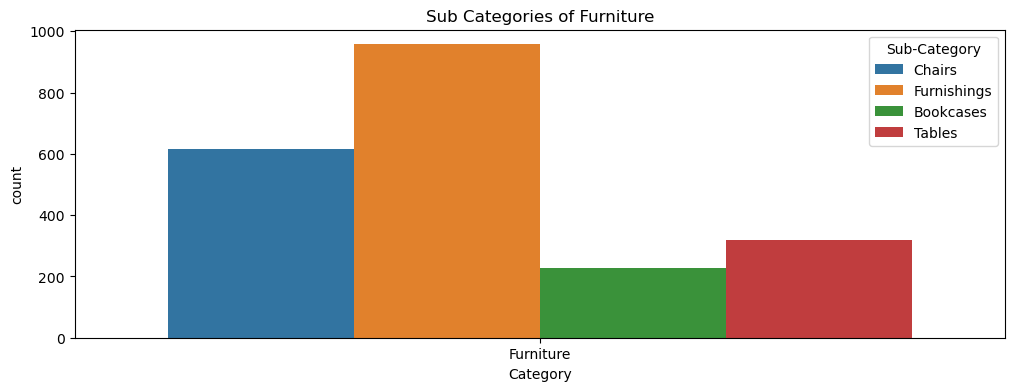

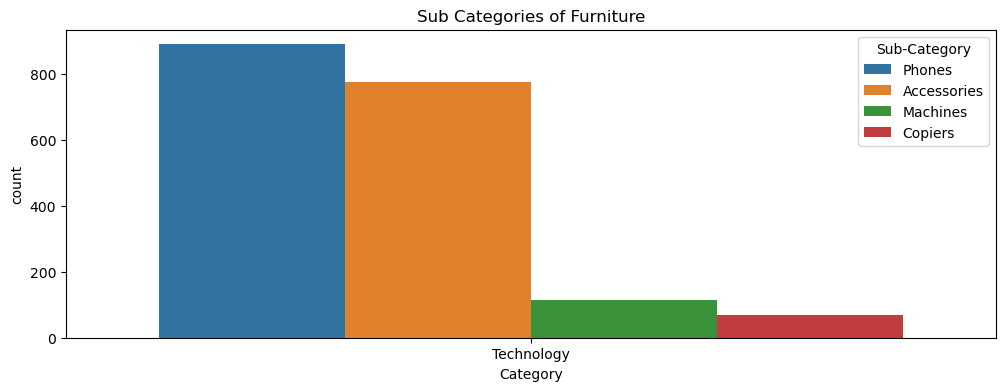

In [38]:
# let's create a plot for two more categories
plt.figure(figsize=(12, 4))
sns.countplot(x='Category', data=super_store[super_store['Category'] == 'Furniture'], hue='Sub-Category')
plt.title('Sub Categories of Furniture')
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(x='Category', data=super_store[super_store['Category'] == 'Technology'], hue='Sub-Category')
plt.title('Sub Categories of Furniture')
plt.show()

**Product Categories:** Office Supplies emerge as the dominant category, significantly outperforming Furniture and Technology. Within each shipping mode, Office Supplies consistently show the highest sales, suggesting that customers prioritize these essential items.

## Analysis on Order Date
- By order date we could find, Which date has the highest sales?

In [39]:
# First we need to check the datatype of date
super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [40]:
# As we can see the datatype of order date is object which is wrong datatype, the datatype for that should be datetime
# let's change the datatype
super_store['Order Date'] = pd.to_datetime(super_store['Order Date'])

In [41]:
# the data type will be changed
super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   object        
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [42]:
# Now we want to do analysis on years and for that we wil have to separate the years
# let's separate the years
super_store['Order Year'] = super_store['Order Date'].dt.year

In [43]:
# Now we have just years so we can continue our analysis
# let's find that in which year the sales are high and low
super_store['Order Year'].value_counts()

Order Year
2022    3312
2021    2587
2020    2102
2019    1993
Name: count, dtype: int64

**Yearly Trends:** Sales have shown a steady increase from 2019 to 2022, reflecting our growing market presence and customer base. This positive trend motivates us to continue enhancing our product offerings and customer experience to sustain this growth trajectory.

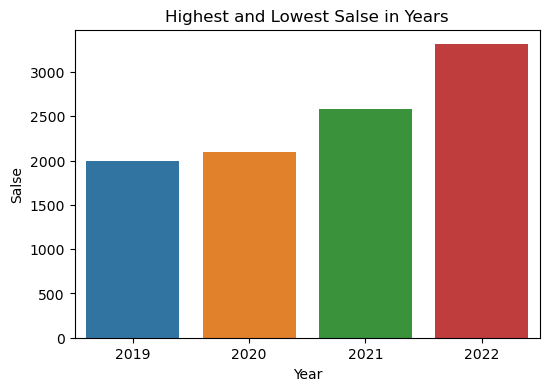

In [44]:
# let's create a plot for year
plt.figure(figsize=(6, 4))
sns.countplot(x='Order Year', data=super_store)
plt.title('Highest and Lowest Salse in Years')
plt.xlabel('Year')
plt.ylabel('Salse')
plt.show()

## Analysis on Profit
- How much profit has been made in which category?

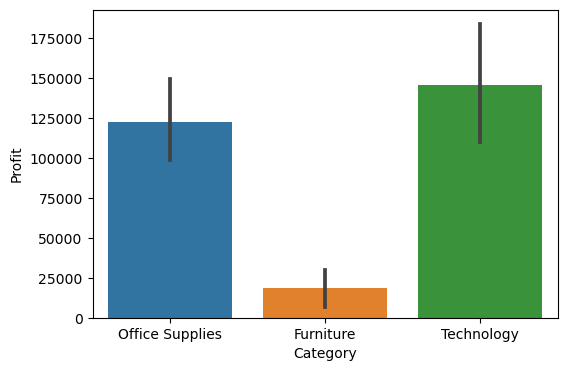

In [45]:
# let's create a barplot to find the total profit for each category
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Profit', data=super_store, estimator='sum')
plt.show()

**Profit Margins:** Technology products, despite being the third largest category in terms of sales, generate the highest profit. This indicates a lucrative opportunity to expand our technology product line and explore premium pricing strategies.

## Analysis on state
- By state analysis we will find, in which state we have highest and lowest salse so that if we have high sales in any state we can give offers to increase more our sales

In [46]:
super_store['State'].value_counts()[:5]

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

**Geographic Distribution:** California, New York, and Texas are our top-performing states, collectively contributing a significant portion of our total sales. Focusing our marketing efforts and promotions in these regions can further amplify our sales growth.

## Recommendations for E-Commerce Sales Optimization
1. #### Shipping Strategy Enhancement:

Promote Standard Class Shipping: Since 59.72% of sales occur via Standard Class, optimizing inventory and logistics around this shipping mode can further enhance customer satisfaction and operational efficiency.
Evaluate Same Day Shipping: With only 5.43% of sales, consider evaluating the cost-effectiveness of offering same day shipping. Promoting it through discounts or special promotions might increase its usage.

2. #### Category-Specific Promotions:
Office Supplies Dominance: Since office supplies are the highest-selling category across all shipping modes, targeted marketing campaigns and bulk purchase discounts could drive even higher sales.
Furniture and Technology: These categories show significant sales but have room for growth. Highlighting these products in sales events and cross-promoting with office supplies could boost their performance.

3. #### Customer Segment Focus:
- **Consumer Segment:** The majority of customers (51.91%) come from the consumer segment. Personalized email campaigns and loyalty programs could enhance repeat purchases.
- **Corporate and Home Office Segments:** Since these segments also contribute significantly, tailor B2B marketing strategies and volume-based discounts to attract larger orders from these groups.

4. #### Seasonal and Annual Trends:
- **Year-over-Year Growth:** With sales increasing every year, preparing for higher demand in the coming years is crucial. Ensuring adequate stock and scalable logistics solutions will help meet this growing demand.
- **Seasonal Sales Promotions:** Analyzing sales data to identify peak seasons and aligning marketing campaigns with these periods can maximize sales.

5. #### Profit Margin Optimization:
- **Focus on Technology Products:** As technology products yield the highest profit, consider expanding this product line, negotiating better supplier terms, or bundling tech products with complementary items.
- **Furniture Category:* Since furniture has the lowest profit, explore cost reduction strategies, better supplier negotiations, or premium product lines to improve margins.

6. #### Geographic Sales Strategies:
- **Top Performing States:** With California, New York, and Texas leading in sales, consider region-specific marketing campaigns and localized promotions to further capitalize on these markets.
- **Underperforming Regions:** Identify and analyze states with lower sales. Implement targeted marketing strategies or investigate potential barriers to increase penetration in these areas. 506

### Conclusion:

Our comprehensive analysis provides a clear roadmap for strategic decision-making. By leveraging these insights, we can optimize our shipping strategies, tailor marketing campaigns to different customer segments, and explore new growth opportunities in underperforming regions. As we continue to evolve, data-driven strategies will remain at the core of our efforts to enhance customer satisfaction and drive business success.